In [1]:
pip install mne


Note: you may need to restart the kernel to use updated packages.


In [2]:
import mne

In [4]:
import zipfile


In [6]:
with zipfile.ZipFile(r"C:\Users\vivek\Data Science\EEG\eeg_train.zip","r") as z:
    z.extractall(".")

In [20]:
import pywt
import pandas as pd
import numpy as np
import scipy.stats as sp

In [21]:
def wavelet_denoising(x, wavelet='db2', level=3):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')
def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def skewness(arr):
    data = arr 
    skew_array = np.zeros(len(data)) #Initialinling the array as all 0s
    index = 0; #current cell position in the output array
   
    for i in data:
        skew_array[index]=sp.stats.skew(i,axis=0,bias=True)
        index+=1 #updating the cell position
    return np.sum(skew_array)/14



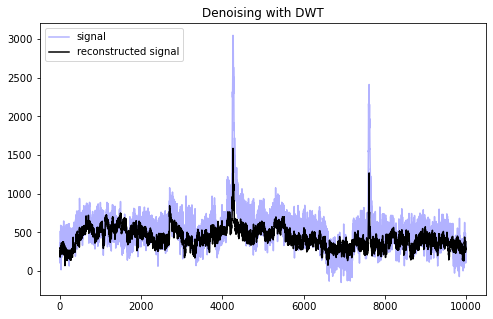

In [24]:
signal=pd.read_csv('train/subj1_series1_data.csv')
#signal=pd.read_csv('C:\Users\vivek\Data Science\vivek\EEG\plattlab\drive-download\PK_Coventry_Trial_Timestamps.csv')
signal = signal.drop("id", axis=1)
filtered = wavelet_denoising(signal, wavelet='db2', level=3)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(signal.iloc[:10000,1], label='signal', color="b", alpha=0.3)
ax.plot(filtered[:10000,1], label='reconstructed signal',color="k")
ax.legend(loc='upper left')
ax.set_title('Denoising with DWT')
plt.show()

In [25]:
signal

,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,...,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10
0,-31,363,211,121,211,15,717,279,35,158,...,536,348,383,105,607,289,459,173,120,704
1,-29,342,216,123,222,200,595,329,43,166,...,529,327,369,78,613,248,409,141,83,737
2,-172,278,105,93,222,511,471,280,12,177,...,511,319,355,66,606,320,440,141,62,677
3,-272,263,-52,99,208,511,428,261,27,180,...,521,336,356,71,568,339,437,139,58,592
4,-265,213,-67,99,155,380,476,353,32,165,...,550,324,346,76,547,343,446,171,67,581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119491,478,520,377,172,141,118,-123,626,70,40,...,383,85,-1,444,337,-255,160,-121,-285,-178
119492,439,450,298,185,128,502,-331,593,30,54,...,334,61,-8,427,322,-310,107,-152,-295,-178
119493,363,370,278,239,124,768,-410,527,16,72,...,303,53,-24,438,368,-134,187,-99,-269,-121
119494,281,298,318,257,130,736,-556,542,29,67,...,341,50,-25,444,348,-135,181,-122,-290,-77


In [31]:
skew_val = skewness(signal.Fp1[:10])

In [32]:
skew_val

0.0